In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow import keras
from keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
img = plt.imread('img.jpg')

In [3]:
def convolution(image,kernel):
  x_image_shape=image.shape[0]
  y_image_shape=image.shape[1]

  x_kernel_shape=kernel.shape[0]
  y_kernel_shape=kernel.shape[1]
  
  output_image=np.zeros((x_image_shape,y_image_shape))
  padded_image=np.pad(image,x_kernel_shape-2)

  for x in range(0,image.shape[0]):
    for y in range(0,image.shape[1]):
      temp=padded_image[x:x+x_kernel_shape,y:y+y_kernel_shape]

      output_image[x,y]=np.sum(np.multiply(temp,kernel))
      
  return output_image

In [5]:
kernel1 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

kernel2 = np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])

# Kernel 1 : Red Channel
conv_1 = convolution(img[::,::,1],kernel1)

# Kernel 2 : Red Channel
conv_2 = convolution(img[::,::,1],kernel2)

In [6]:
# Kernal 1 output
cv2.imwrite('output_image1_k1.jpg', conv_1)

# Kernal 2 output
cv2.imwrite('output_image1_k2.jpg', conv_2)

True

Original x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)

INFO:tensorflow:Assets written to: cifar.model\assets


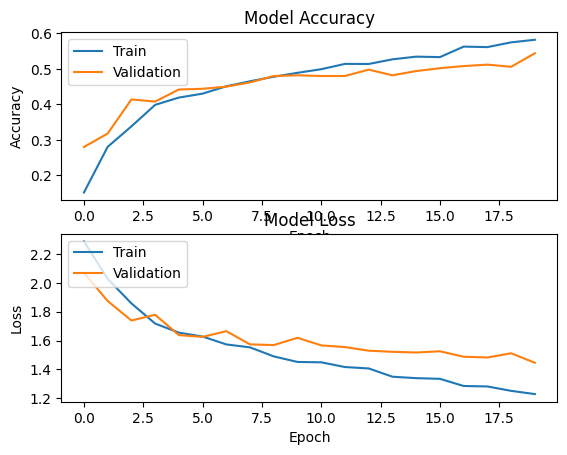

157/157 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       505
           1       0.76      0.78      0.77       460
           2       0.58      0.52      0.55       519
           3       0.56      0.51      0.53       486
           4       0.55      0.55      0.55       519
           5       0.65      0.53      0.58       488
           6       0.55      0.76      0.64       518
           7       0.72      0.66      0.69       486
           8       0.71      0.75      0.73       520
           9       0.69      0.74      0.72       498

    accuracy                           0.64      4999
   macro avg       0.64      0.64      0.64      4999
weighted avg       0.64      0.64      0.64      4999

[[312  19  24   9  19   2   6   9  77  28]
 [ 11 357   3   0   5   0  15   3  24  42]
 [ 27   5 268  38  64  20  52  19  18   8]
 [  5   7  26 246  35  47  76  16   6  22]
 [ 22   3  51

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.datasets import cifar10

classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

n = 5000
x_train, y_train = x_train[1:n], y_train[1:n]

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("Original x_train shape:", x_train.shape)

y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

use_saved_model = False
if use_saved_model:
    model = load_model("cifar.model")
else:
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
    model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))
    
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")

    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

Original x_train shape: (9999, 32, 32, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_1 (De

INFO:tensorflow:Assets written to: cifar.model\assets


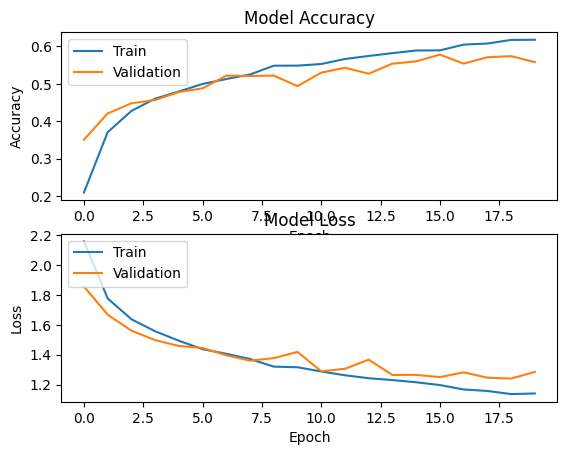

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      1005
           1       0.80      0.76      0.78       974
           2       0.62      0.49      0.55      1032
           3       0.47      0.61      0.53      1016
           4       0.68      0.43      0.53       999
           5       0.50      0.73      0.59       937
           6       0.69      0.74      0.71      1029
           7       0.70      0.75      0.73      1001
           8       0.84      0.64      0.72      1025
           9       0.68      0.79      0.73       981

    accuracy                           0.65      9999
   macro avg       0.67      0.66      0.65      9999
weighted avg       0.67      0.65      0.65      9999

[[629  36  46  50  23  21   8  33  79  80]
 [ 16 739   4  20   4  14  25  11  13 128]
 [ 42   5 505 120  65 135  85  49   9  17]
 [  8   4  31 620  20 212  70  35   3  13]
 [ 19   5 119

In [8]:
classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=10000
x_train = x_train[1:n]; y_train=y_train[1:n]

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("Original x_train shape:", x_train.shape)

y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

use_saved_model = False
if use_saved_model:
    model = load_model("cifar.model")
else:
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
    model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))
    
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")

    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

Original x_train shape: (19999, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (D

INFO:tensorflow:Assets written to: cifar.model\assets


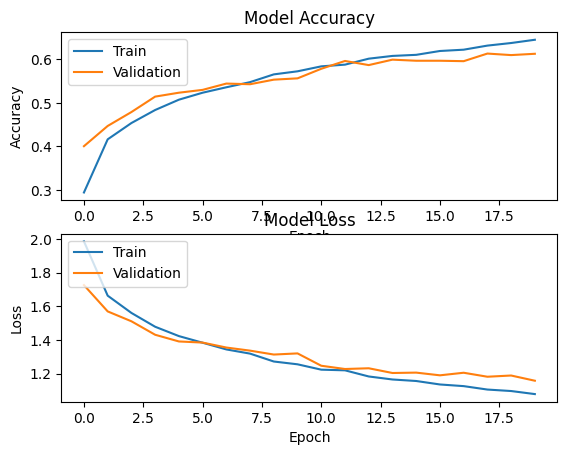

625/625 [==============================] - 4s 6ms/step
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1989
           1       0.83      0.81      0.82      1981
           2       0.61      0.58      0.59      2042
           3       0.49      0.62      0.55      2011
           4       0.66      0.56      0.61      2009
           5       0.66      0.55      0.60      1925
           6       0.65      0.86      0.74      2037
           7       0.82      0.70      0.75      2027
           8       0.75      0.83      0.79      2012
           9       0.81      0.74      0.77      1966

    accuracy                           0.69     19999
   macro avg       0.70      0.69      0.69     19999
weighted avg       0.70      0.69      0.69     19999

[[1375   35  106   68   24   19   28   29  250   55]
 [  49 1598   16   28    8    4   44    6   81  147]
 [ 101   14 1183  185  159   92  198   34   61   15]
 [  19    8  124 1245   73 

In [9]:
classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=20000
x_train = x_train[1:n]; y_train=y_train[1:n]

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("Original x_train shape:", x_train.shape)

y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

use_saved_model = False
if use_saved_model:
    model = load_model("cifar.model")
else:
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
    model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))
    
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")

    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

Original x_train shape: (39999, 32, 32, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (D

INFO:tensorflow:Assets written to: cifar.model\assets


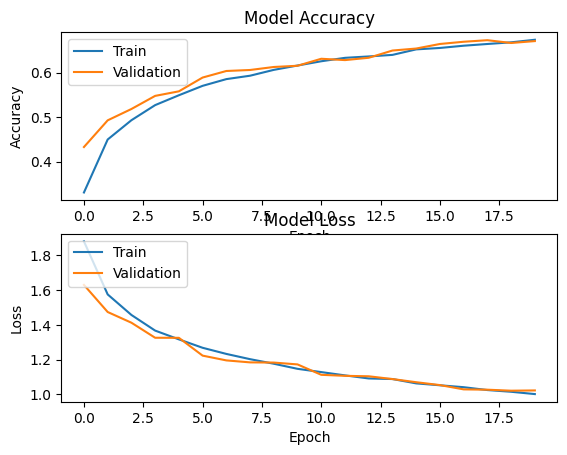

1250/1250 [==============================] - 12s 9ms/step
              precision    recall  f1-score   support

           0       0.66      0.84      0.74      3986
           1       0.77      0.90      0.83      3986
           2       0.72      0.52      0.60      4048
           3       0.60      0.50      0.55      3984
           4       0.72      0.61      0.66      4003
           5       0.65      0.63      0.64      3975
           6       0.78      0.79      0.78      4019
           7       0.67      0.83      0.74      4023
           8       0.84      0.80      0.82      3997
           9       0.80      0.77      0.79      3978

    accuracy                           0.72     39999
   macro avg       0.72      0.72      0.71     39999
weighted avg       0.72      0.72      0.71     39999

[[3340  110   62   24   30   18   11   56  221  114]
 [ 106 3591   11   18    3    7   13   14   56  167]
 [ 497   39 2092  213  309  245  251  272   87   43]
 [ 161   59  170 1999  1

In [10]:
classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=40000
x_train = x_train[1:n]; y_train=y_train[1:n]

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("Original x_train shape:", x_train.shape)

y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

use_saved_model = False
if use_saved_model:
    model = load_model("cifar.model")
else:
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
    model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))
    
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")

    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

L1 Value : 0.001
orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 

INFO:tensorflow:Assets written to: cifar.model\assets


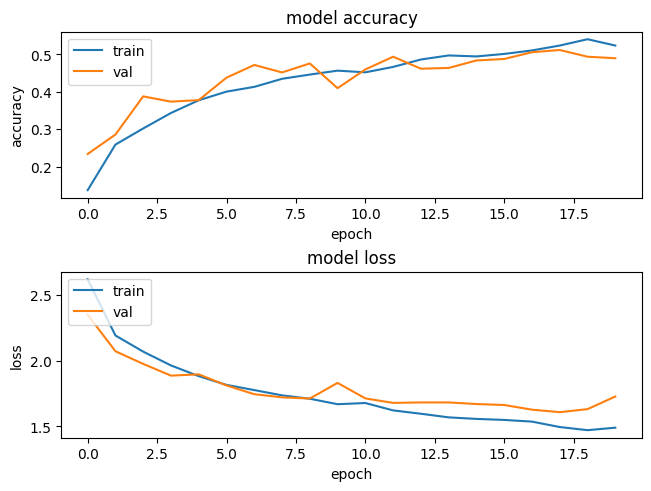

157/157 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

           0       0.72      0.43      0.54       505
           1       0.86      0.48      0.62       460
           2       0.40      0.61      0.48       519
           3       0.49      0.37      0.42       486
           4       0.55      0.39      0.45       519
           5       0.41      0.65      0.51       488
           6       0.68      0.49      0.57       518
           7       0.50      0.69      0.58       486
           8       0.63      0.72      0.67       520
           9       0.63      0.65      0.64       498

    accuracy                           0.55      4999
   macro avg       0.59      0.55      0.55      4999
weighted avg       0.59      0.55      0.55      4999

[[215   7  73  10  13  14   2  35 115  21]
 [  6 222  13   8   3  17  24  18  47 102]
 [  8   1 314  25  35  57  17  44  13   5]
 [  3   0  57 179  18 145  28  40   5  11]
 [  9   0 125 

INFO:tensorflow:Assets written to: cifar.model\assets


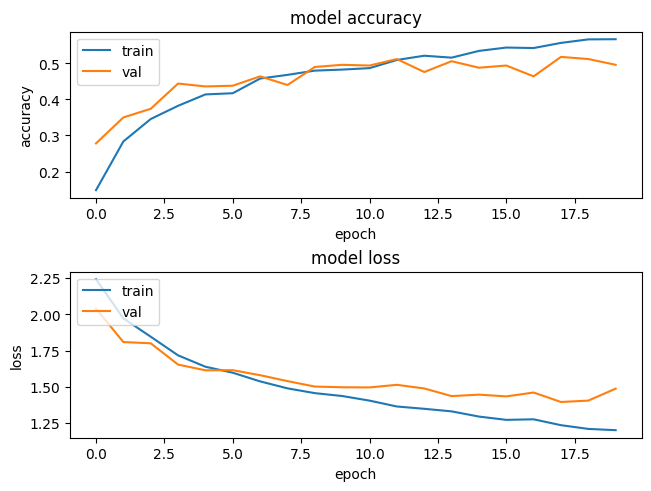

157/157 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

           0       0.69      0.57      0.62       505
           1       0.76      0.72      0.74       460
           2       0.51      0.56      0.53       519
           3       0.46      0.58      0.51       486
           4       0.68      0.32      0.44       519
           5       0.46      0.68      0.55       488
           6       0.64      0.69      0.66       518
           7       0.58      0.69      0.63       486
           8       0.80      0.59      0.68       520
           9       0.71      0.68      0.70       498

    accuracy                           0.61      4999
   macro avg       0.63      0.61      0.61      4999
weighted avg       0.63      0.61      0.61      4999

[[286  21  49  17  11  18   7  27  43  26]
 [  7 330   6  12   4  12  20   9  12  48]
 [ 12   3 293  54  15  68  35  32   4   3]
 [  3   3  24 280  10 102  35  18   2   9]
 [ 10   2  93 

INFO:tensorflow:Assets written to: cifar.model\assets


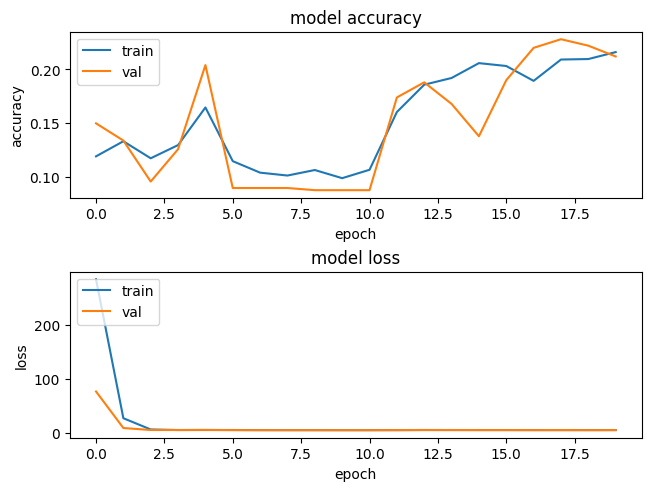

157/157 [==============================] - 2s 11ms/step


c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.21      0.79      0.33       505
           1       0.61      0.02      0.05       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.08      0.01      0.02       519
           5       0.00      0.00      0.00       488
           6       0.18      0.95      0.30       518
           7       0.37      0.21      0.27       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.20      4999
   macro avg       0.14      0.20      0.10      4999
weighted avg       0.14      0.20      0.10      4999

[[401   3   0   1   5   0  68  27   0   0]
 [288  11   0   0   9   0 134  18   0   0]
 [124   0   0   1   8   0 371  15   0   0]
 [ 92   0   0   0   1   0 386   7   0   0]
 [ 69   0   0   0   5   0 415  30   0   0]
 [ 82   0   0   0   8   0 

c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.21      0.80      0.33      1000
           1       0.55      0.03      0.05      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.08      0.01      0.02      1000
           5       0.25      0.00      0.00      1000
           6       0.17      0.94      0.29      1000
           7       0.37      0.22      0.27      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.20     10000
   macro avg       0.16      0.20      0.10     10000
weighted avg       0.16      0.20      0.10     10000

[[798   5   0   0   8   0 138  51   0   0]
 [635  26   0   0  16   0 299  24   0   0]
 [226   1   0   0   9   1 711  52   0   0]
 [198   2   0   0  12   0 764  24   0   0]
 [127   1   0   0  11   1 811  49   0   0]
 [177   0   0   0  21   1 

INFO:tensorflow:Assets written to: cifar.model\assets


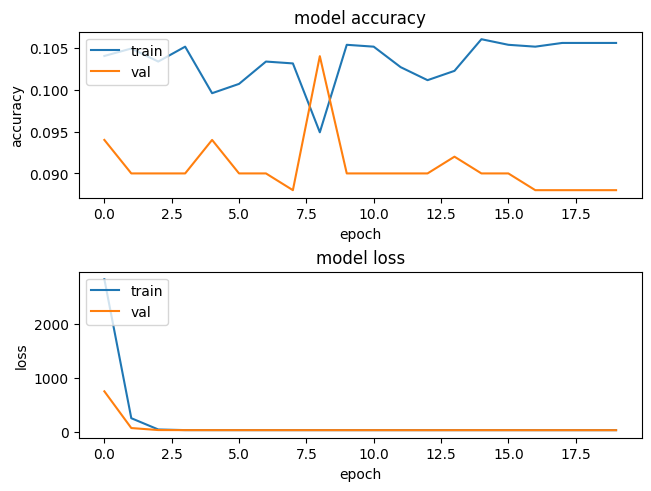

157/157 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.10      1.00      0.19       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[  0   0   0   0 505   0   0   0   0   0]
 [  0   0   0   0 460   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0 486   0   0   0   0   0]
 [  0   0   0 

c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

313/313 [==============================] - 3s 9ms/step


c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

[[   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000   

INFO:tensorflow:Assets written to: cifar.model\assets


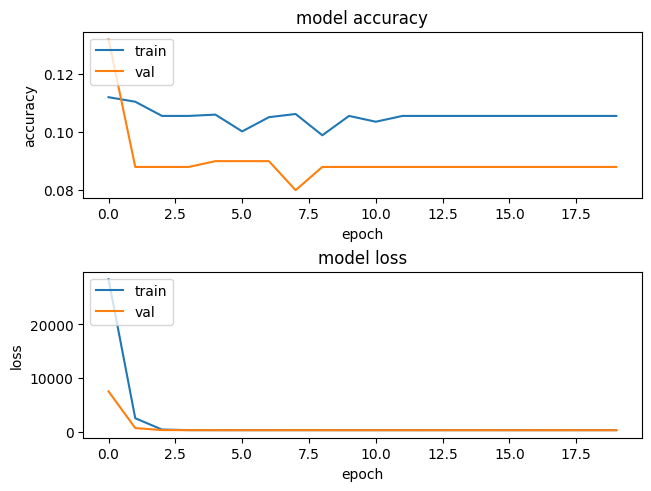

157/157 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.10      1.00      0.19       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[  0   0   0   0 505   0   0   0   0   0]
 [  0   0   0   0 460   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0 486   0   0   0   0   0]
 [  0   0   0 

c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.10      1.00      0.18      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

[[   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000    0    0    0    0    0]
 [   0    0    0    0 1000 

c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [11]:
l1Values = [0.001, 0, 1, 10, 100]

for l1Value in l1Values:
  print(f'L1 Value : {l1Value}')
  plt.rc('font', size=10)
  plt.rcParams['figure.constrained_layout.use'] = True

  classes = 10
  input_shape = (32, 32, 3)

  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  n=5000
  x_train = x_train[1:n]; y_train=y_train[1:n]

  x_train = x_train.astype("float32") / 255
  x_test = x_test.astype("float32") / 255
  print("orig x_train shape:", x_train.shape)

  y_train = keras.utils.to_categorical(y_train, classes)
  y_test = keras.utils.to_categorical(y_test, classes)

  use_saved_model = False
  if use_saved_model:
    model = load_model("cifar.model")
  else:
    model = keras.Sequential()
    model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
    model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(classes, activation='softmax', kernel_regularizer = regularizers.l1(l1Value)))
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")
    
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss'); plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

  preds = model.predict(x_train)
  y_pred = np.argmax(preds, axis=1)
  y_train1 = np.argmax(y_train, axis=1)
  print(classification_report(y_train1, y_pred))
  print(confusion_matrix(y_train1, y_pred))

  preds = model.predict(x_test)
  y_pred = np.argmax(preds, axis=1)
  y_test1 = np.argmax(y_test, axis=1)
  print(classification_report(y_test1, y_pred))
  print(confusion_matrix(y_test1, y_pred))

Original x_train shape: (4999, 32, 32, 3)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_39 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 32)          0         
 D)                                                              
                                                                 
 dropout_9 (Dropout)         (None, 4, 4, 32)          0         
            

INFO:tensorflow:Assets written to: cifar.model\assets


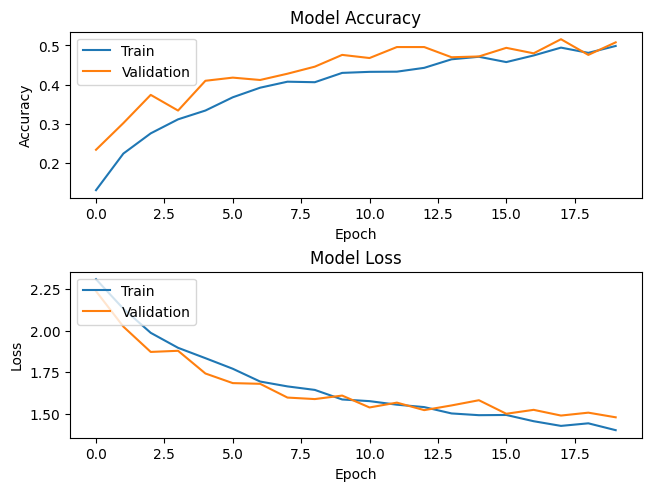

157/157 [==============================] - 2s 10ms/step
              precision    recall  f1-score   support

           0       0.56      0.51      0.54       505
           1       0.73      0.55      0.63       460
           2       0.48      0.45      0.47       519
           3       0.51      0.35      0.42       486
           4       0.49      0.47      0.48       519
           5       0.47      0.57      0.52       488
           6       0.64      0.59      0.61       518
           7       0.63      0.55      0.58       486
           8       0.54      0.75      0.63       520
           9       0.56      0.71      0.63       498

    accuracy                           0.55      4999
   macro avg       0.56      0.55      0.55      4999
weighted avg       0.56      0.55      0.55      4999

[[260  13  26   3  11   6   1   9 148  28]
 [ 16 253   1   3   3   6  11   4  52 111]
 [ 38   5 234  23  76  45  37  22  25  14]
 [  9   5  45 171  34 115  37  23  18  29]
 [ 35   2  55

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.datasets import cifar10

classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

n = 5000
x_train, y_train = x_train[1:n], y_train[1:n]

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("Original x_train shape:", x_train.shape)

y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

use_saved_model = False
if use_saved_model:
    model = load_model("cifar.model")
else:
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
    model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))
    
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")

    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))

In [13]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy="most_frequent").fit(x_train, y_train)
print("Dummy model")

preds_dummy = dummy_model.predict(x_train)
y_pred_dummy = np.argmax(preds_dummy, axis=1)
y_train1_dummy = np.argmax(y_train, axis=1)

print(classification_report(y_train1_dummy, y_pred_dummy))
print(confusion_matrix(y_train1_dummy, y_pred_dummy))

preds_dummy = dummy_model.predict(x_test)
y_pred_dummy = np.argmax(preds_dummy, axis=1)
y_test1_dummy = np.argmax(y_test, axis=1)

print(classification_report(y_test1_dummy, y_pred_dummy))
print(confusion_matrix(y_test1_dummy, y_pred_dummy))

Dummy model
              precision    recall  f1-score   support

           0       0.10      1.00      0.18       505
           1       0.00      0.00      0.00       460
           2       0.00      0.00      0.00       519
           3       0.00      0.00      0.00       486
           4       0.00      0.00      0.00       519
           5       0.00      0.00      0.00       488
           6       0.00      0.00      0.00       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.01      0.10      0.02      4999
weighted avg       0.01      0.10      0.02      4999

[[505   0   0   0   0   0   0   0   0   0]
 [460   0   0   0   0   0   0   0   0   0]
 [519   0   0   0   0   0   0   0   0   0]
 [486   0   0   0   0   0   0   0   0   0]
 [519   0   0   0   0   0   0   0   0   0]
 [488   0   0 

c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Original x_train shape: (49999, 32, 32, 3)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 conv2d_41 (Conv2D)          (None, 16, 16, 8)         264       
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 16)        1168      
                                                                 
 conv2d_43 (Conv2D)          (None, 8, 8, 16)          2320      
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_45 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 dropout_1

INFO:tensorflow:Assets written to: cifar.model\assets


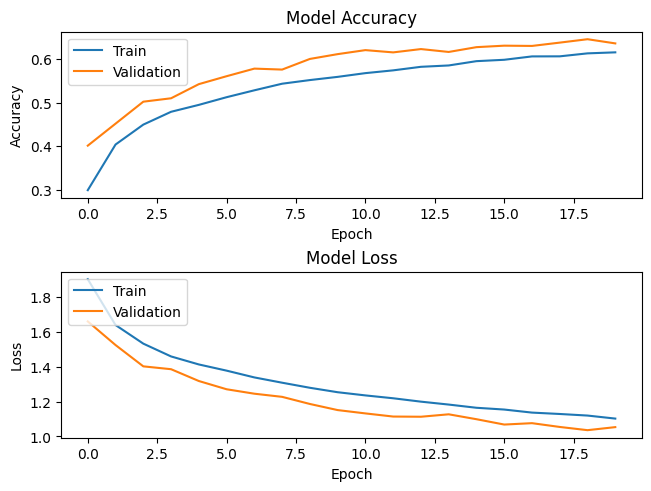

1563/1563 [==============================] - 12s 7ms/step
              precision    recall  f1-score   support

           0       0.78      0.61      0.69      5000
           1       0.77      0.80      0.78      5000
           2       0.72      0.37      0.49      5000
           3       0.47      0.43      0.45      5000
           4       0.55      0.63      0.59      5000
           5       0.52      0.60      0.56      5000
           6       0.61      0.82      0.70      4999
           7       0.66      0.73      0.69      5000
           8       0.80      0.78      0.79      5000
           9       0.72      0.77      0.74      5000

    accuracy                           0.65     49999
   macro avg       0.66      0.65      0.65     49999
weighted avg       0.66      0.65      0.65     49999

[[3041  201  158  170  201   64  108  166  567  324]
 [  51 3976   10   46   40   37  127   48  107  558]
 [ 286   29 1844  475  884  519  537  286   90   50]
 [  45   28  144 2127  3

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.datasets import cifar10

classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

n = 50000
x_train, y_train = x_train[1:n], y_train[1:n]

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("Original x_train shape:", x_train.shape)

y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

use_saved_model = False
if use_saved_model:
    model = load_model("cifar.model")
else:
    model = Sequential()
    model.add(Conv2D(8, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
    model.add(Conv2D(8, (2,2),strides =(2,2) , padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))
    
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.model")

    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
print(confusion_matrix(y_train1,y_pred))

preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1,y_pred))